# Visualizing Earnings based on College Majors

We'll be working with a dataset on the job outcomes of students who graduated from college between 2010 and 2012. The original data on job outcomes was released by [American Community Survey](https://www.census.gov/programs-surveys/acs/), which conducts surveys and aggregates the data. FiveThirtyEight cleaned the dataset and released it on their [Github repo](https://github.com/fivethirtyeight/data/tree/master/college-majors).

Each row in the dataset represents a different major in college and contains information on gender diversity, employment rates, median salaries, and more. Here are some of the columns in the dataset:

- `Rank` - Rank by median earnings (the dataset is ordered by this column).
- `Major_code` - Major code.
- `Major` - Major description.
- `Major_category` - Category of major.
- `Total` - Total number of people with major.
- `Sample_size` - Sample size (unweighted) of full-time.
- `Men` - Male graduates.
- `Women` - Female graduates.
- `ShareWomen` - Women as share of total.
- `Employed` - Number employed.
- `Median` - Median salary of full-time, year-round workers.
- `Low_wage_jobs` - Number in low-wage service jobs.
- `Full_time` - Number employed 35 hours or more.
- `Part_time` - Number employed less than 35 hours.

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Jupyter magic so that plots are displayed inline.
%matplotlib inline

recent_grads = pd.read_csv("datasets/recent-grads.csv")

print(recent_grads.iloc[0])

Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object


In [27]:
print(recent_grads.head())

   Rank  Major_code                                      Major    Total  \
0     1        2419                      PETROLEUM ENGINEERING   2339.0   
1     2        2416             MINING AND MINERAL ENGINEERING    756.0   
2     3        2415                  METALLURGICAL ENGINEERING    856.0   
3     4        2417  NAVAL ARCHITECTURE AND MARINE ENGINEERING   1258.0   
4     5        2405                       CHEMICAL ENGINEERING  32260.0   

       Men    Women Major_category  ShareWomen  Sample_size  Employed  ...  \
0   2057.0    282.0    Engineering    0.120564           36      1976  ...   
1    679.0     77.0    Engineering    0.101852            7       640  ...   
2    725.0    131.0    Engineering    0.153037            3       648  ...   
3   1123.0    135.0    Engineering    0.107313           16       758  ...   
4  21239.0  11021.0    Engineering    0.341631          289     25694  ...   

   Part_time  Full_time_year_round  Unemployed  Unemployment_rate  Median  \
0  

In [28]:
print(recent_grads.tail())

     Rank  Major_code                   Major   Total     Men   Women  \
168   169        3609                 ZOOLOGY  8409.0  3050.0  5359.0   
169   170        5201  EDUCATIONAL PSYCHOLOGY  2854.0   522.0  2332.0   
170   171        5202     CLINICAL PSYCHOLOGY  2838.0   568.0  2270.0   
171   172        5203   COUNSELING PSYCHOLOGY  4626.0   931.0  3695.0   
172   173        3501         LIBRARY SCIENCE  1098.0   134.0   964.0   

               Major_category  ShareWomen  Sample_size  Employed  ...  \
168    Biology & Life Science    0.637293           47      6259  ...   
169  Psychology & Social Work    0.817099            7      2125  ...   
170  Psychology & Social Work    0.799859           13      2101  ...   
171  Psychology & Social Work    0.798746           21      3777  ...   
172                 Education    0.877960            2       742  ...   

     Part_time  Full_time_year_round  Unemployed  Unemployment_rate  Median  \
168       2190                  3602       

In [29]:
recent_grads.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


In [30]:
# Drop rows with missing values. Matplotlib expects that columns of values we pass in have matching
# lengths and missing values will cause matplotlib to throw errors.
raw_data_count = recent_grads.shape[0]
recent_grads = recent_grads.dropna()
cleaned_data_count = recent_grads.shape[0]
print(raw_data_count)
print(cleaned_data_count)

173
172


Only one row contained missing values and was dropped.

## Scatter plots to explore relations

### Sample_size and Median

<AxesSubplot:xlabel='Sample_size', ylabel='Median'>

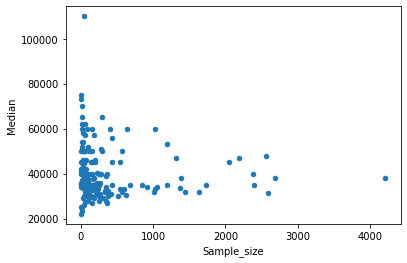

In [31]:
recent_grads.plot(x="Sample_size", y="Median", kind="scatter")

### Sample_size and Unemployment_rate

<AxesSubplot:xlabel='Sample_size', ylabel='Unemployment_rate'>

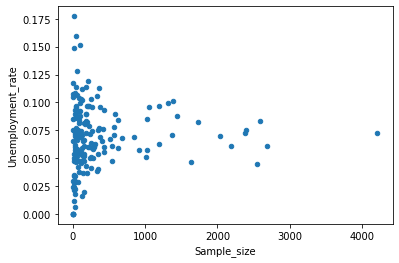

In [32]:
recent_grads.plot(x="Sample_size", y="Unemployment_rate", kind="scatter")

### ShareWomen and Unemployment_rate

<AxesSubplot:xlabel='ShareWomen', ylabel='Unemployment_rate'>

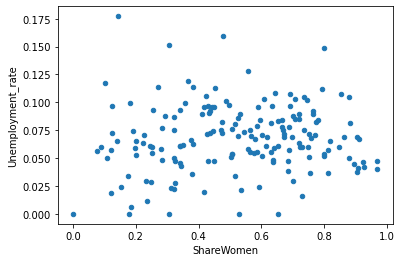

In [33]:
recent_grads.plot(x="ShareWomen", y="Unemployment_rate", kind="scatter")

### Men and Median

<AxesSubplot:xlabel='Men', ylabel='Median'>

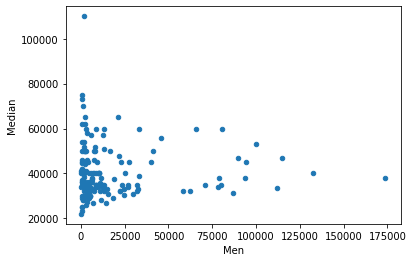

In [34]:
recent_grads.plot(x="Men", y="Median", kind="scatter")

### Major_code and Median

<AxesSubplot:xlabel='Major_code', ylabel='Median'>

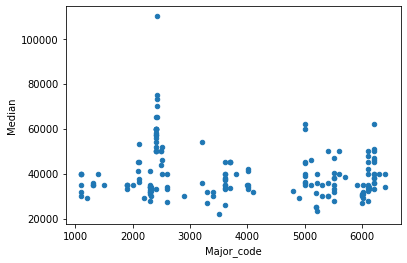

In [35]:
recent_grads.plot(x="Major_code", y="Median", kind="scatter")

### ShareWomen and Median

<AxesSubplot:xlabel='ShareWomen', ylabel='Median'>

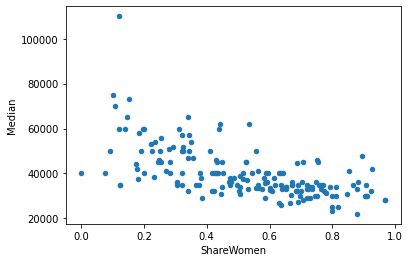

In [36]:
recent_grads.plot(x="ShareWomen", y="Median", kind="scatter")

### Full_time and Median

<AxesSubplot:xlabel='Full_time', ylabel='Median'>

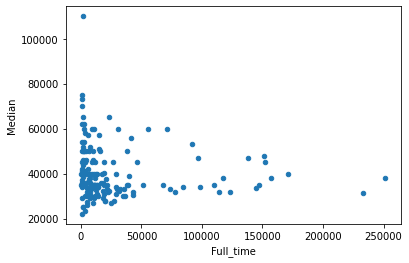

In [37]:
recent_grads.plot(x="Full_time", y="Median", kind="scatter")

## Exploring distributions of various columns

<AxesSubplot:>

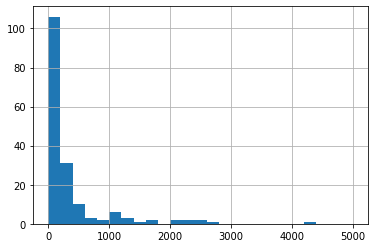

In [38]:
recent_grads["Sample_size"].hist(bins=25, range=(0, 5000))

<AxesSubplot:>

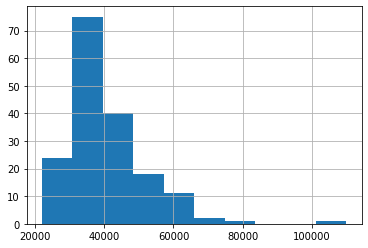

In [39]:
recent_grads["Median"].hist()

<AxesSubplot:>

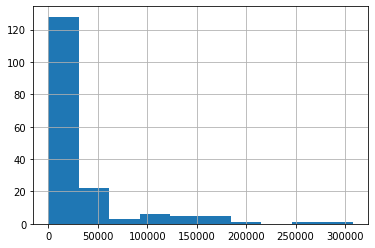

In [40]:
recent_grads["Employed"].hist()

<AxesSubplot:>

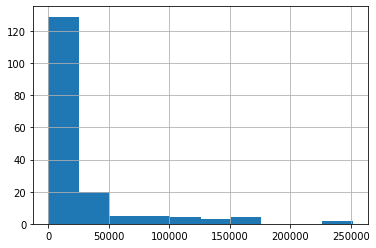

In [41]:
recent_grads["Full_time"].hist()

<AxesSubplot:>

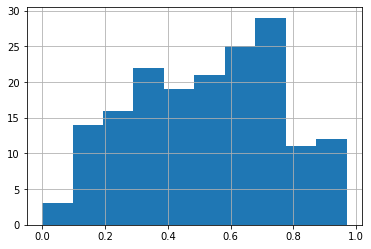

In [42]:
recent_grads["ShareWomen"].hist()

<AxesSubplot:>

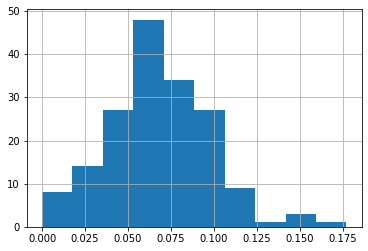

In [43]:
recent_grads["Unemployment_rate"].hist()

<AxesSubplot:>

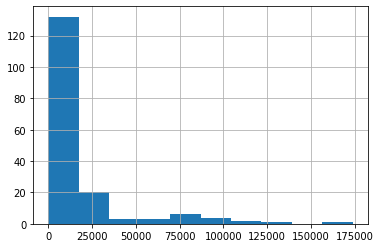

In [44]:
recent_grads["Men"].hist()

<AxesSubplot:>

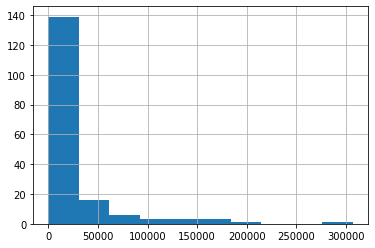

In [45]:
recent_grads["Women"].hist()

## Scatter Matrix Plot

In [46]:
from pandas.plotting import scatter_matrix

array([[<AxesSubplot:xlabel='Sample_size', ylabel='Sample_size'>,
        <AxesSubplot:xlabel='Median', ylabel='Sample_size'>],
       [<AxesSubplot:xlabel='Sample_size', ylabel='Median'>,
        <AxesSubplot:xlabel='Median', ylabel='Median'>]], dtype=object)

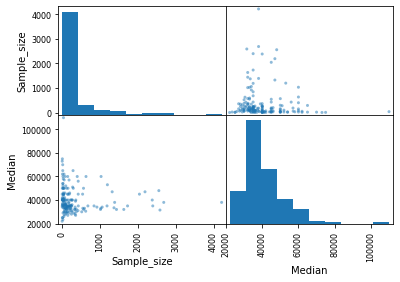

In [47]:
scatter_matrix(recent_grads[["Sample_size", "Median"]])

array([[<AxesSubplot:xlabel='Sample_size', ylabel='Sample_size'>,
        <AxesSubplot:xlabel='Median', ylabel='Sample_size'>,
        <AxesSubplot:xlabel='Unemployment_rate', ylabel='Sample_size'>],
       [<AxesSubplot:xlabel='Sample_size', ylabel='Median'>,
        <AxesSubplot:xlabel='Median', ylabel='Median'>,
        <AxesSubplot:xlabel='Unemployment_rate', ylabel='Median'>],
       [<AxesSubplot:xlabel='Sample_size', ylabel='Unemployment_rate'>,
        <AxesSubplot:xlabel='Median', ylabel='Unemployment_rate'>,
        <AxesSubplot:xlabel='Unemployment_rate', ylabel='Unemployment_rate'>]],
      dtype=object)

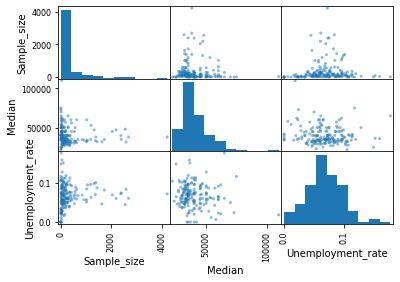

In [48]:
scatter_matrix(recent_grads[["Sample_size", "Median", "Unemployment_rate"]])

## Pandas, Bar Plots

<AxesSubplot:xlabel='Major'>

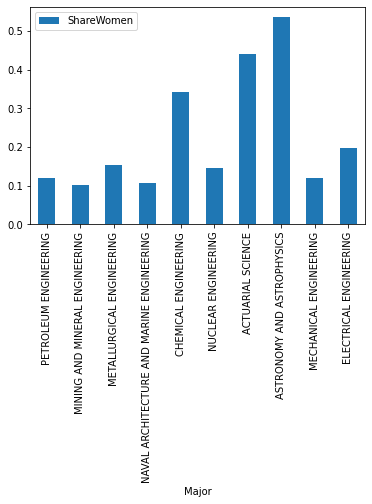

In [49]:
# recent_grads[:10]["ShareWomen"].plot(kind="bar")
recent_grads[:10].plot.bar(x="Major", y="ShareWomen")

<AxesSubplot:xlabel='Major'>

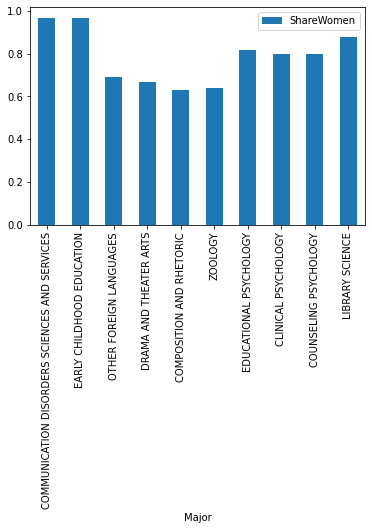

In [50]:
recent_grads[-10:].plot.bar(x="Major", y="ShareWomen")